In [1]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

In [7]:
#pip install librosa

In [3]:
ls C:\Users\Chani\Desktop\AML\tensorflow-speech-recognition-challenge

 Volume in drive C has no label.
 Volume Serial Number is DA97-590C

 Directory of C:\Users\Chani\Desktop\AML\tensorflow-speech-recognition-challenge

04/03/2025  09:09 pm    <DIR>          .
04/03/2025  09:09 pm    <DIR>          ..
04/03/2025  08:30 pm                50 link_to_gcp_credits_form.txt
04/03/2025  08:30 pm           512,684 sample_submission.7z
14/11/2017  03:16 am         4,280,538 sample_submission.csv
14/11/2017  02:17 am    <DIR>          test
04/03/2025  08:30 pm     2,640,679,130 test.7z
13/11/2017  09:16 pm    <DIR>          train
04/03/2025  08:30 pm     1,121,103,842 train.7z
               5 File(s)  3,766,576,244 bytes
               4 Dir(s)  95,572,111,360 bytes free


In [5]:
os.listdir(r'C:\Users\Chani\Desktop\AML\tensorflow-speech-recognition-challenge')

['link_to_gcp_credits_form.txt',
 'sample_submission.7z',
 'sample_submission.csv',
 'test',
 'test.7z',
 'train',
 'train.7z']

In [7]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


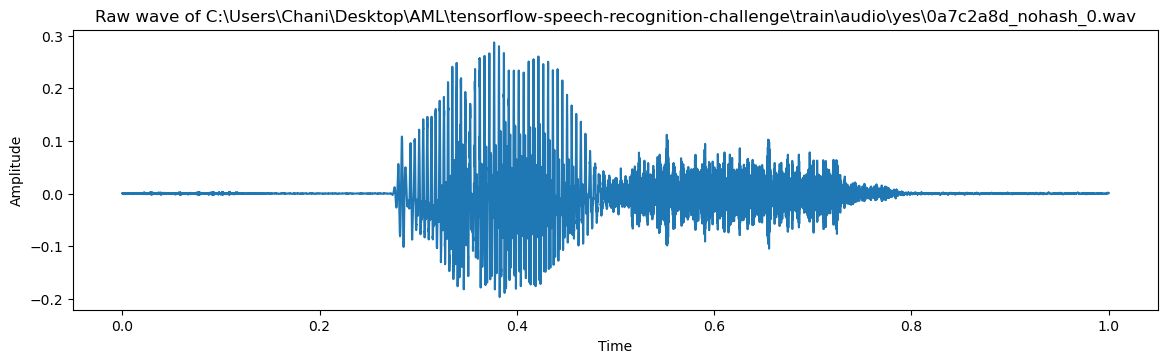

In [7]:
# Define the path to the audio file
train_audio_path = r'C:\Users\Chani\Desktop\AML\tensorflow-speech-recognition-challenge\train\audio'
file_path = os.path.join(train_audio_path, 'yes', '0a7c2a8d_nohash_0.wav')

# Load the audio file
samples, sample_rate = librosa.load(file_path, sr=16000)

# Plot the raw wave
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + file_path)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples) / sample_rate, len(samples)), samples)
plt.show()


In [9]:
ipd.Audio(samples, rate=sample_rate)

In [11]:
print(sample_rate)

16000


In [13]:
new_sample_rate = 8000

# Resample the audio
samples_resampled = librosa.resample(samples, orig_sr=sample_rate, target_sr=new_sample_rate)

# Play the resampled audio
ipd.Audio(samples_resampled, rate=new_sample_rate)

In [15]:
 labels=os.listdir(train_audio_path)

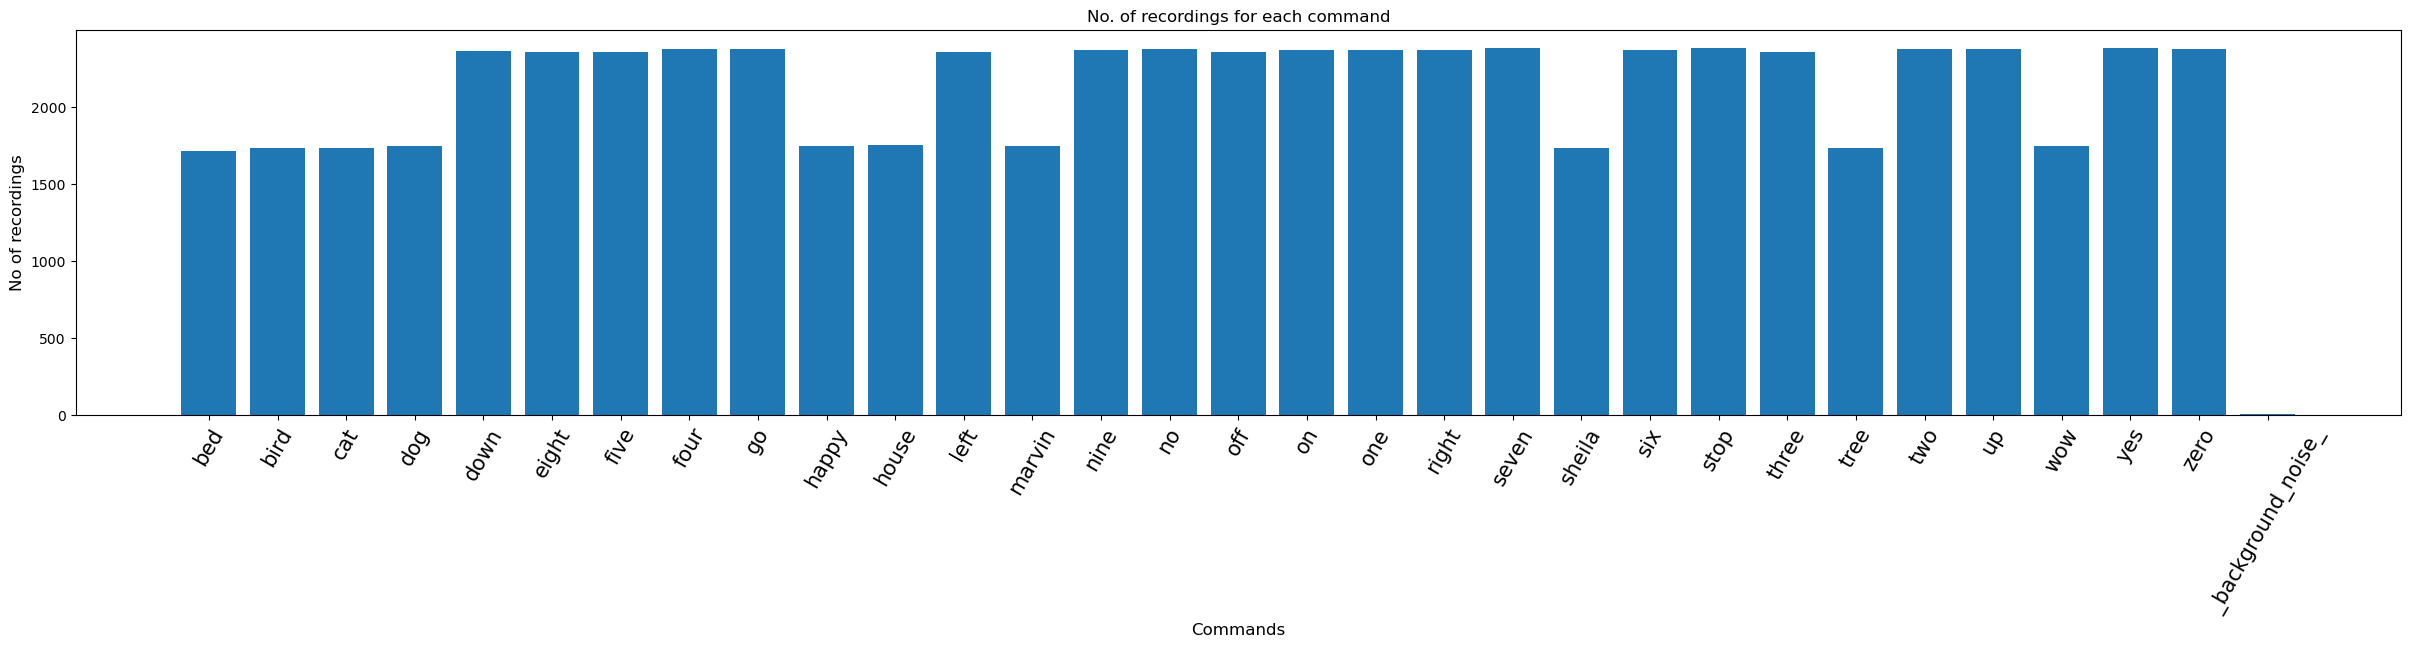

In [17]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [19]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

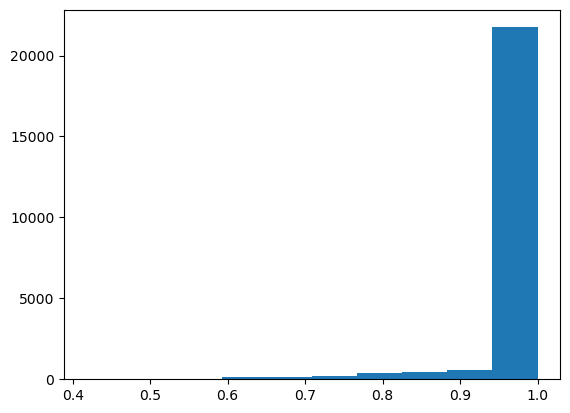

In [21]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
plt.hist(np.array(duration_of_recordings))

In [23]:
import os
import librosa

train_audio_path = r'C:\Users\Chani\Desktop\AML\tensorflow-speech-recognition-challenge\train\audio'
all_wave = []
all_label = []

for label in labels:
    print(label)
    waves = [f for f in os.listdir(os.path.join(train_audio_path, label)) if f.endswith('.wav')]
    
    for wav in waves:
        samples, sample_rate = librosa.load(os.path.join(train_audio_path, label, wav), sr=16000)
        samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
        
        if len(samples) == 8000:
            all_wave.append(samples)
            all_label.append(label)


yes
no
up
down
left
right
on
off
stop
go


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [27]:
from tensorflow.keras import utils as utils

In [29]:
y=utils.to_categorical(y, num_classes=len(labels))

In [31]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [33]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [35]:
from tensorflow import keras as keras

In [37]:
#Deep learning
import tensorflow.keras as keras
#from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K

In [39]:
K.clear_session()

In [41]:
inputs = Input(shape=(8000,1))
#First Conv1D layer
conv = layers.Conv1D(8,13, padding='valid', activation='relu',strides=1)(inputs)
conv = layers.MaxPooling1D(3)(conv)
conv = layers.Dropout(0.3)(conv)
#Second Conv1D layer
conv = layers.Conv1D(16, 11, padding='valid', activation='relu',strides=1)(conv)
conv = layers.MaxPooling1D(3)(conv)
conv = layers.Dropout(0.3)(conv)
#Third Conv1D layer
conv = layers.Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = layers.MaxPooling1D(3)(conv)
conv = layers.Dropout(0.3)(conv)
#Fourth Conv1D layer
conv = layers.Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = layers.MaxPooling1D(3)(conv)
conv = layers.Dropout(0.3)(conv)
#Flatten layer
conv = layers.Flatten()(conv)
#Dense Layer 1
conv = layers.Dense(256, activation='relu')(conv)
conv = layers.Dropout(0.3)(conv)
#Dense Layer 2
conv = layers.Dense(128, activation='relu')(conv)
conv = layers.Dropout(0.3)(conv)
outputs = layers.Dense(len(labels), activation='softmax')(conv)
model = keras.Model(inputs, outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8000, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 7988, 8)        │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2662, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2662, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2652, 16)       │         1,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 884, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 884, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 876, 32)        │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 292, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 292, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 286, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 95, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 95, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,556,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,611,498 (6.15 MB)

 Trainable params: 1,611,498 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)

# Model checkpoint callback
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [49]:
history=model.fit(x_tr, y_tr ,epochs=1, callbacks=[es,mc], batch_size=32,validation_data=(x_val,y_val))

533/533 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.1512 - loss: 2.2322 - val_accuracy: 0.4269 - val_loss: 1.5746


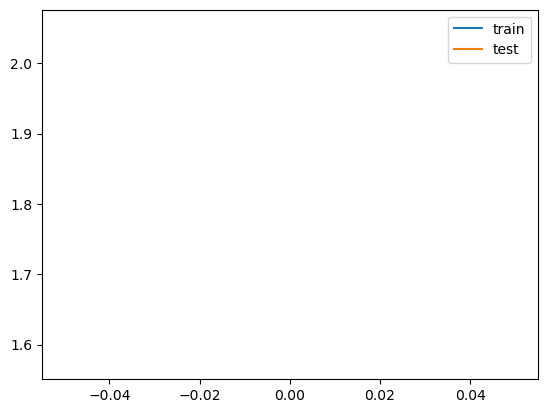

In [53]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [55]:
from keras.models import load_model
model=load_model('best_model.hdf5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'best_model.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [57]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [59]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: up
